# Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

<b>Business Goal:</b> You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

<b>Model Building</b>

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

We will perform following steps on bike sharing data

- Reading and understanding data
- Data encoding
- Data visualization 
- Preparing data for model (train-test split, rescaling etc.)
- Training the model
- Residual analysis
- Prediction and evaluations

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#supress warnings
import warnings
warnings.filterwarnings("ignore")


## importing packages libraries for Linear regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# reading data
df=pd.read_csv("day.csv")

## Step 1: Data analysis

In [3]:
#get top 5 rows for having glimpse of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking shapes of data (rows  and columns)
df.shape

(730, 16)

In [5]:
# desrbing data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking null values if any
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#No of unique values if any
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**from above there are no columns having null values**

In [9]:
# renaming few columns for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
# check headset after renaming columns
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
#check headset after drop
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Checking Shape of data
df.shape

(730, 12)

## Step 2 : Data encoding

following columns need data encoding
- season
- month
- weekday
- weathersit

In [14]:
# enconding season 
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# Encoding month
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [16]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [17]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [18]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# finding info about objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3: Data visualization

In [20]:
# checking indexes of columns/names of columns
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

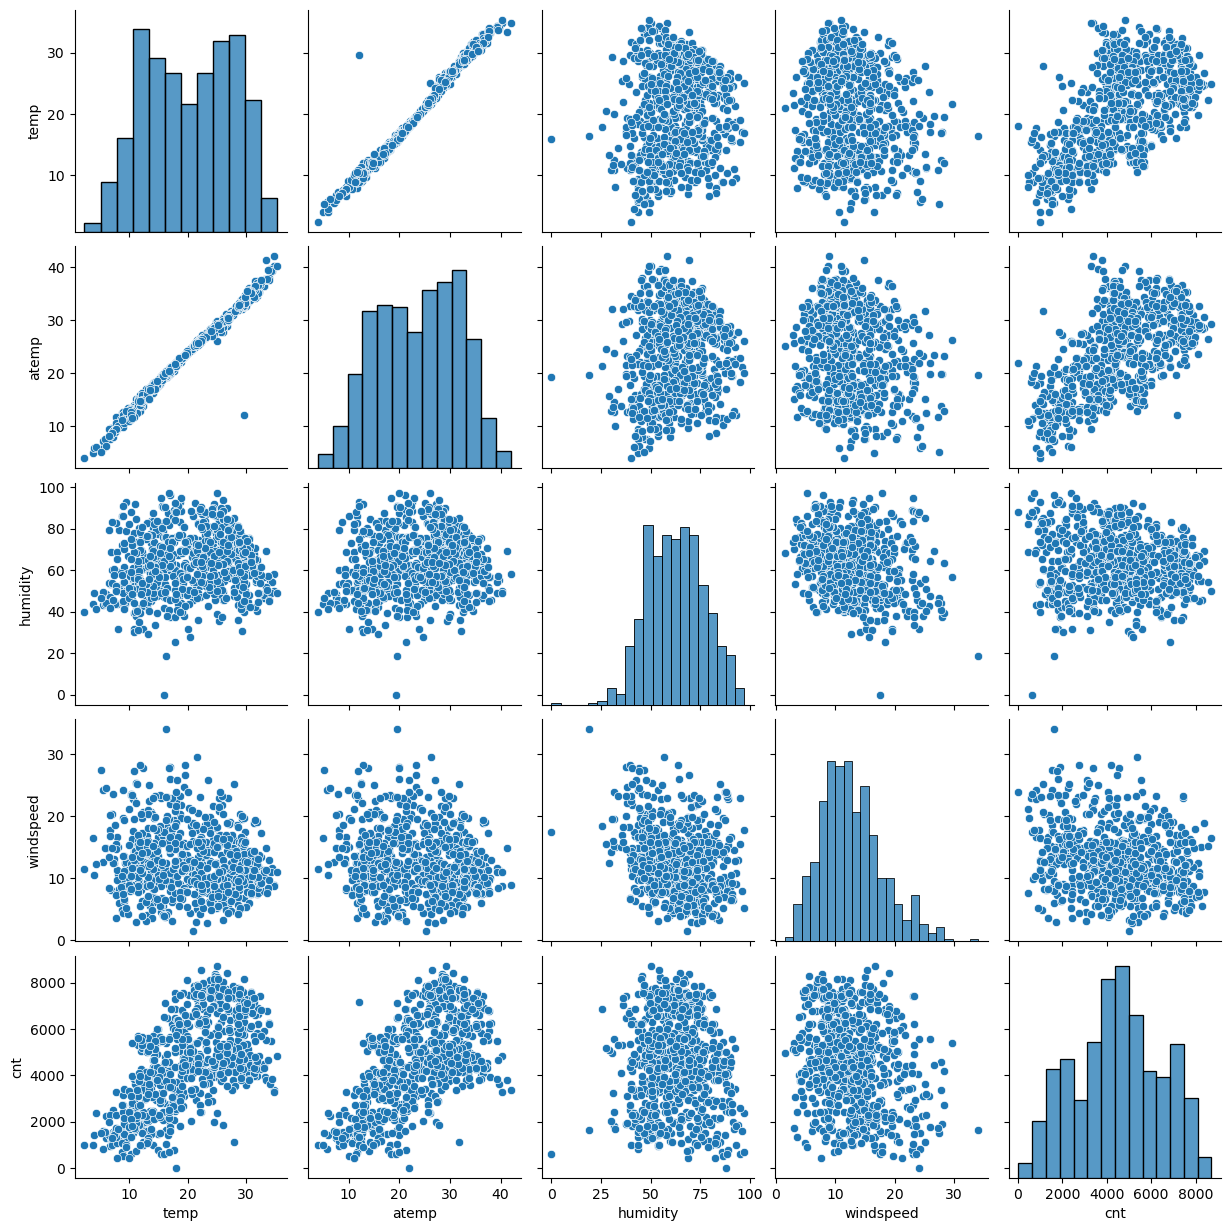

In [21]:
# Analysing/visualizing the numerical columns
# we will use pair plot
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [22]:
##checking correlation
df.corr

<bound method DataFrame.corr of      season  year month  holiday weekday  workingday weathersit       temp  \
0    spring     0   jan        0     mon           1      Misty  14.110847   
1    spring     0   jan        0     tue           1      Misty  14.902598   
2    spring     0   jan        0     wed           1      Clear   8.050924   
3    spring     0   jan        0     thu           1      Clear   8.200000   
4    spring     0   jan        0     fri           1      Clear   9.305237   
..      ...   ...   ...      ...     ...         ...        ...        ...   
725  spring     1   dec        0     fri           1      Misty  10.420847   
726  spring     1   dec        0     sat           0      Misty  10.386653   
727  spring     1   dec        0     sun           0      Misty  10.386653   
728  spring     1   dec        0     mon           1      Clear  10.489153   
729  spring     1   dec        0     tue           1      Misty   8.849153   

        atemp  humidity  windsp

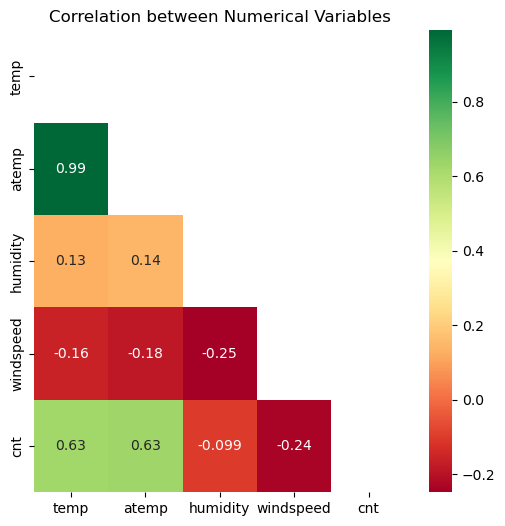

In [23]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

<b>from above chart it is visible that corilation between temp i.e temperature in Celsius and atemp: feeling temperature in Celsius is 0.99 which is very high that means they are inter-dependant variables. We will drop temp variable here due to high correlation value</b>

In [24]:
df.drop(["temp"],axis=1,inplace=True)
df.head(3)

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,9.47025,43.7273,16.636703,1349


<b>Analysing/visualizing the following categorical columns using box plot </b>
- season
- month
- weekday
- weathersit
- holiday
- year

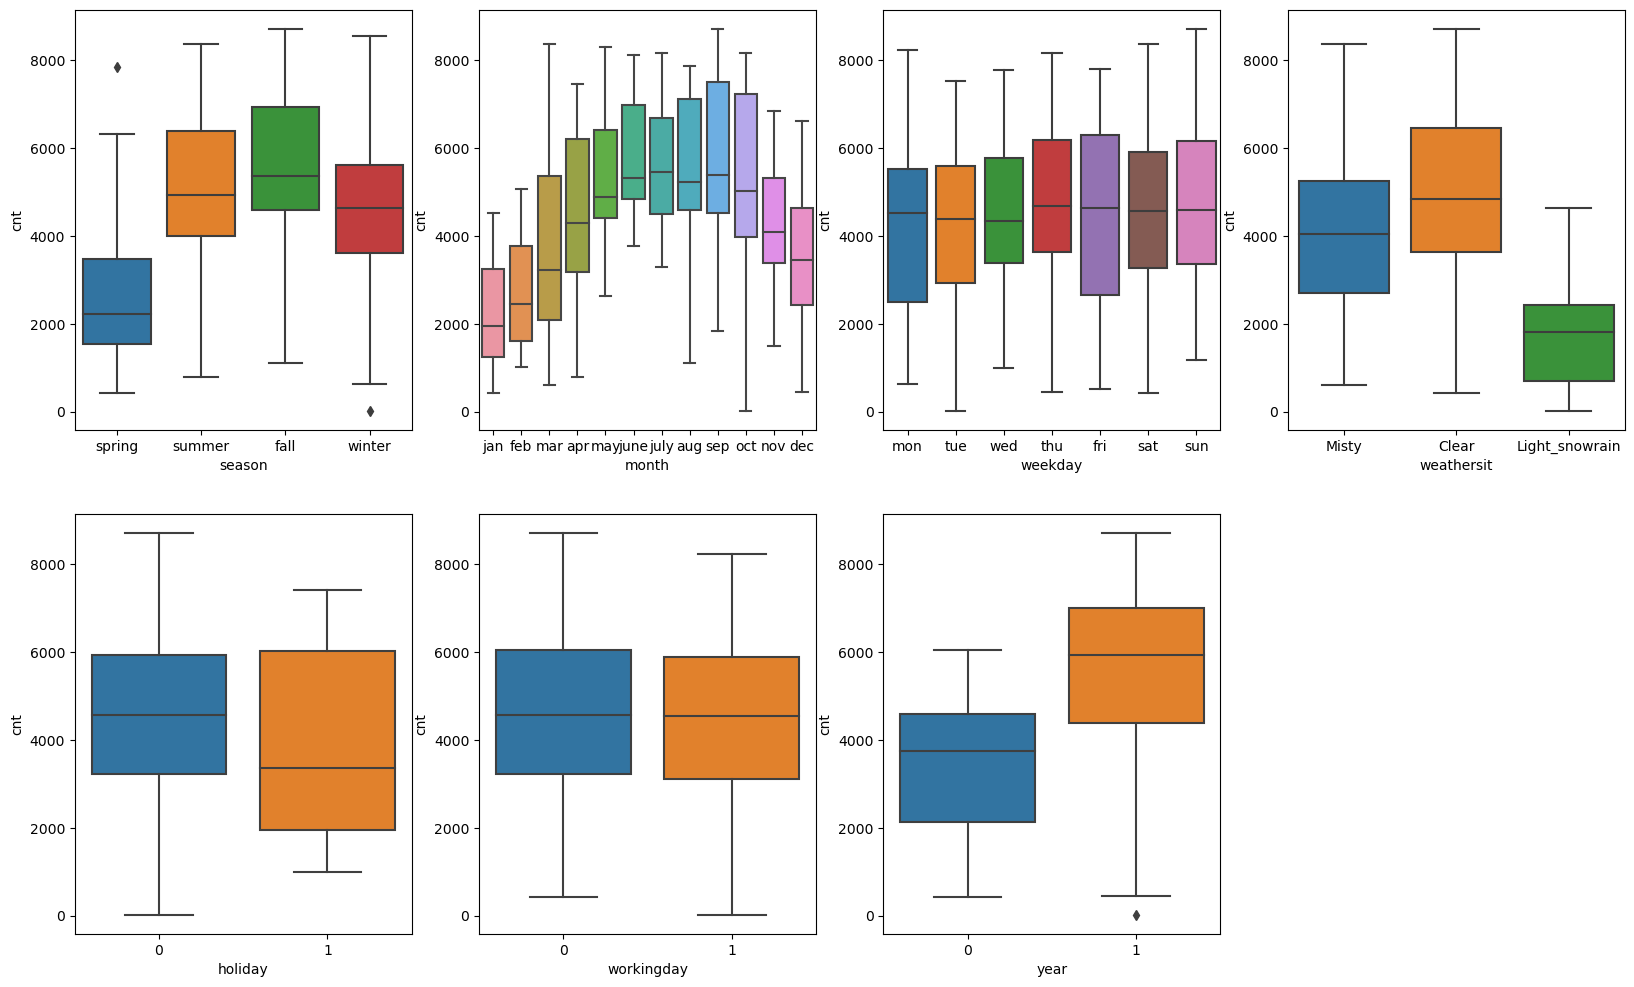

In [25]:
# Analysing/visualizing the categorical columns using box plot
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

#### Analysing categorical columns using bar plot for comparison and more analysis

In [26]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

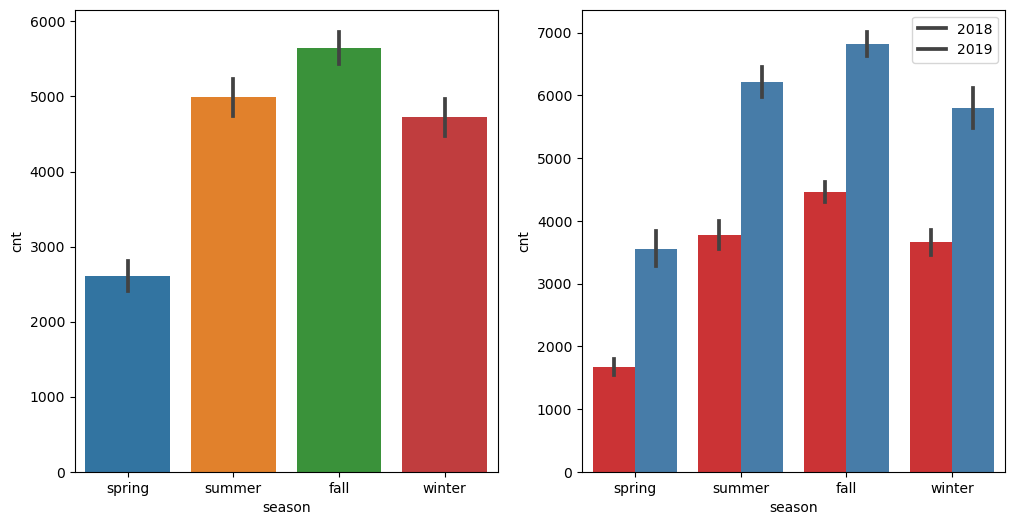

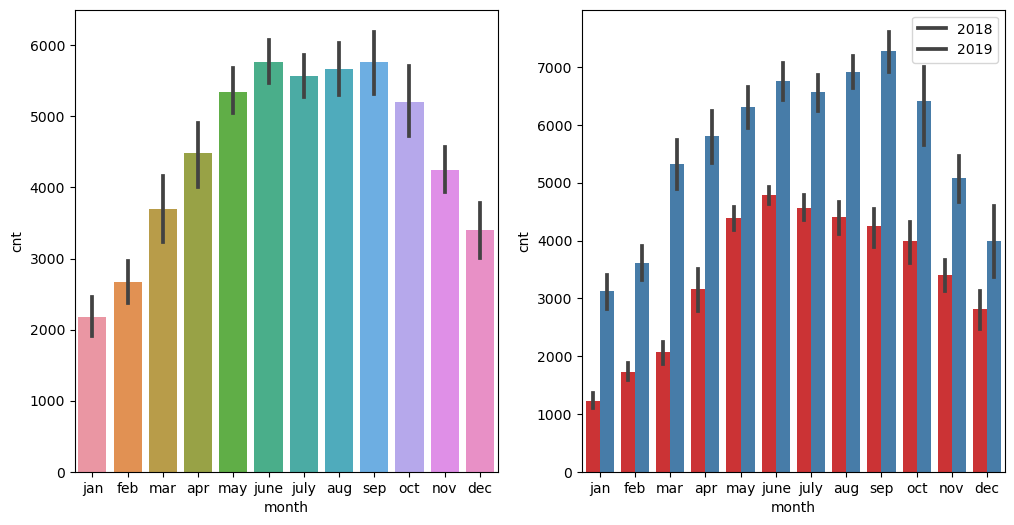

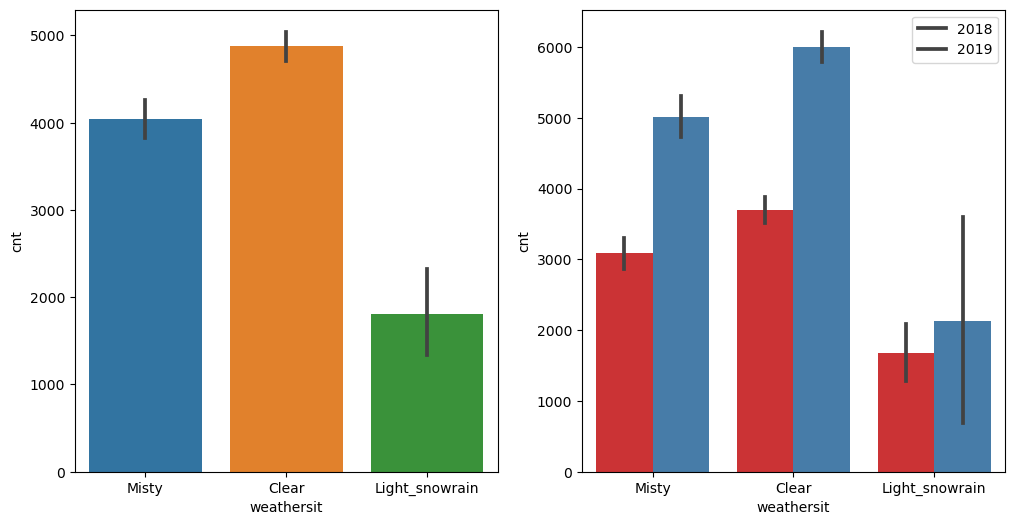

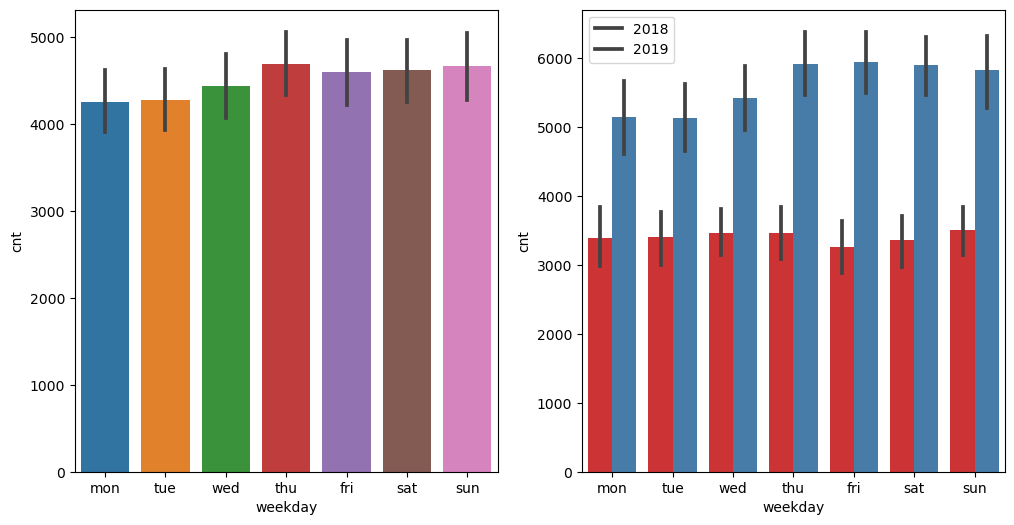

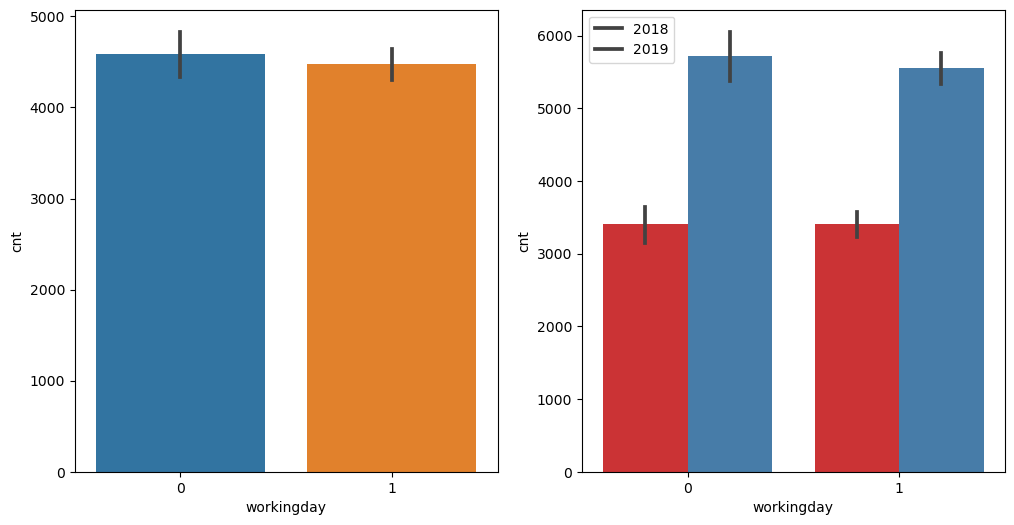

In [27]:
plot_categories=['season','month','weathersit','weekday','workingday']
for i in plot_categories:
    plot_cat_columns(i)

<b>From above we can conclude following:</b>
- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
- Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.
- Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.
- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
- When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

### Dealing with outliers

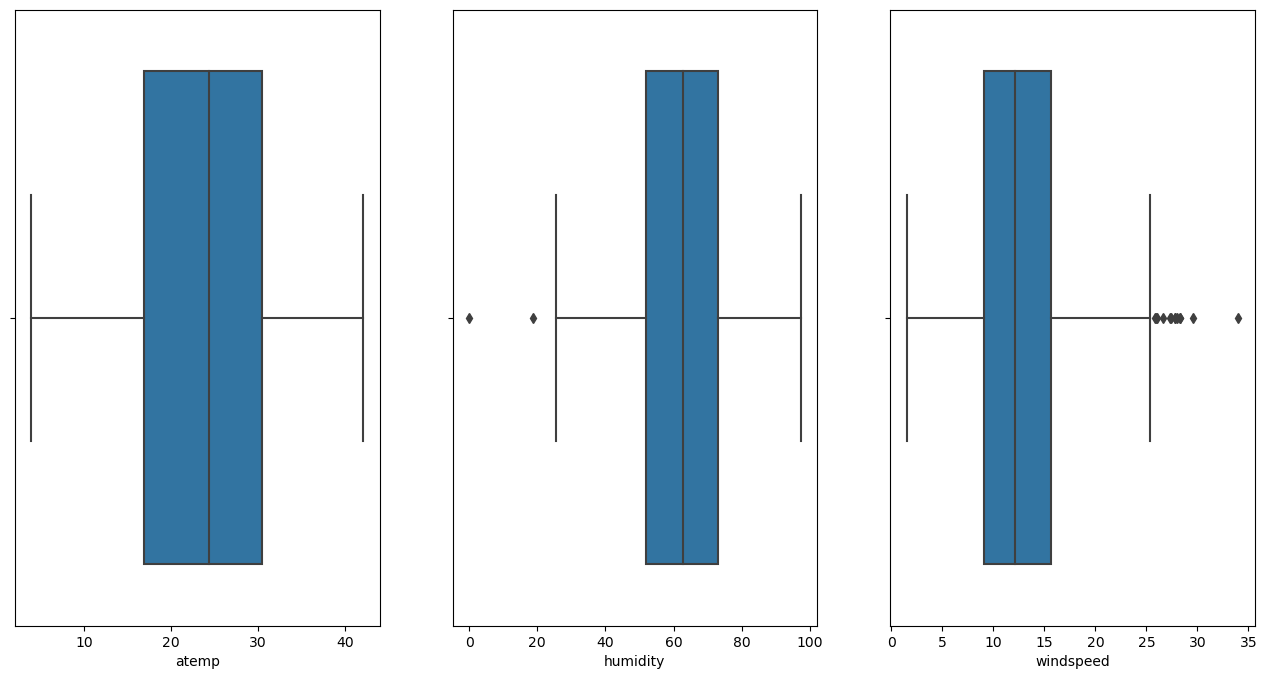

In [28]:
#there can be some outliers in atemp, humidity, windspeed column variables
# we can check it using boxplot
plt.figure(figsize = (16, 8))
plt.subplot(1,3,1)
sns.boxplot(df['atemp'])
plt.subplot(1,3,2)
sns.boxplot(df['humidity'])
plt.subplot(1,3,3)
sns.boxplot(df['windspeed'])
plt.show()

In [29]:
## Dropping indexes having outliers for windspeed and humidity columns
df = df.drop(index = df[(df['windspeed'] > 30)].index)
df = df.drop(index = df[(df['humidity'] < 20)].index)

In [30]:
# final shape of data after dropping outliers
df.shape

(728, 11)

## Step 4: Data Preparation

In [31]:
# creating Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [32]:
# data snap before concating dummy variables
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,11.46350,43.6957,12.522300,1600


In [33]:
# merging  dummy variables to data
df=pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

since we have added new columns as dummy variables we can drop following columns
- season
- weekday
- weathersit
- month

In [34]:
# dropping unnecessary columns as we already have dummy variable columns for same
df_final=df.drop(columns=['season','weekday','weathersit','month'])
#lets have a look for data post concat
df_final.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# checking data for columns and its data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            728 non-null    int64  
 1   holiday         728 non-null    int64  
 2   workingday      728 non-null    int64  
 3   atemp           728 non-null    float64
 4   humidity        728 non-null    float64
 5   windspeed       728 non-null    float64
 6   cnt             728 non-null    int64  
 7   aug             728 non-null    uint8  
 8   dec             728 non-null    uint8  
 9   feb             728 non-null    uint8  
 10  jan             728 non-null    uint8  
 11  july            728 non-null    uint8  
 12  june            728 non-null    uint8  
 13  mar             728 non-null    uint8  
 14  may             728 non-null    uint8  
 15  nov             728 non-null    uint8  
 16  oct             728 non-null    uint8  
 17  sep             728 non-null    uin

In [36]:
# final shape before splitting data into train and test
df_final.shape

(728, 29)

#### Splitting data

In [37]:
# splitting data into train and test for preparing model
np.random.seed(0)
df_train, df_test = train_test_split(df_final, train_size = 0.8, random_state = 20)

In [38]:
# Checking shape of train data
df_train.shape

(582, 29)

In [39]:
# Checking columns of train data
df_train.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [40]:
#Checking shape of test data
df_test.shape

(146, 29)

#### Rescaling 

In [41]:
# Using MinMaxScaler to Rescaling the features
scaler=MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['atemp','humidity','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [43]:
# verifying the head after appying scaling.
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
591,1,0,1,0.754722,0.508700,0.351597,0.834963,1,0,0,...,0,0,1,0,0,0,0,0,0,0
294,0,0,1,0.454726,0.522042,0.167652,0.468067,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207,0,0,1,0.802804,0.207077,0.384261,0.510081,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,1,0.695906,0.639791,0.221061,0.557165,0,0,0,...,0,0,0,1,0,0,0,0,0,0
405,1,0,0,0.281545,0.397912,0.225534,0.410479,0,0,1,...,0,1,0,0,0,0,1,1,0,0


In [44]:
# describe data
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,...,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.498282,0.027491,0.689003,0.522913,0.524668,0.396548,0.491175,0.085911,0.084192,0.077320,...,0.144330,0.144330,0.132302,0.139175,0.135739,0.032646,0.331615,0.243986,0.261168,0.235395
std,0.500427,0.163651,0.463300,0.214666,0.198397,0.181852,0.231459,0.280473,0.277915,0.267328,...,0.351726,0.351726,0.339111,0.346427,0.342806,0.177861,0.471198,0.429854,0.439649,0.424611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340567,0.373840,0.267066,0.330647,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.543405,0.515081,0.373142,0.496076,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.667343,0.497535,0.664222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Divide data into X and Y set for model building </b>

In [45]:
# Building the Linear Model
y_train=df_train.pop("cnt")
X_train=df_train

In [46]:
# view data of X_train
X_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
591,1,0,1,0.754722,0.508700,0.351597,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
294,0,0,1,0.454726,0.522042,0.167652,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207,0,0,1,0.802804,0.207077,0.384261,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,1,0.695906,0.639791,0.221061,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
405,1,0,0,0.281545,0.397912,0.225534,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [47]:
# view data of y_train
y_train.head()

591    0.834963
294    0.468067
207    0.510081
253    0.557165
405    0.410479
Name: cnt, dtype: float64

## Step 5: Building our model

In [48]:
# Recursive feature elimination 

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15, step=1, verbose=0, importance_getter='auto')
#or rfe=RFE(lm)
rfe=rfe.fit(X_train,y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 10),
 ('mar', False, 13),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', False, 2),
 ('sun', False, 3),
 ('thu', False, 11),
 ('tue', False, 7),
 ('wed', False, 8),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1)]

In [50]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'features' : X_train.columns,'rank' : rfe.ranking_, 'support': rfe.support_ }).sort_values(by='rank',ascending=True)
rfe_ranking

,features,rank,support
0,year,1,True
25,spring,1,True
24,Misty,1,True
23,Light_snowrain,1,True
16,sep,1,True
14,nov,1,True
10,july,1,True
9,jan,1,True
27,winter,1,True
7,dec,1,True


In [51]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [52]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'summer'],
      dtype='object')

In [53]:
# Creating generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Building model using statsmodel, for the detailed statistics

In [54]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [55]:
# Building 1st  linear regression model

X_train_rfe_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_rfe_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.75e-214
Time:                        00:54:22   Log-Likelihood:                 561.38
No. Observations:                 582   AIC:                            -1091.
Df Residuals:                     566   BIC:                            -1021.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3366      0.028     11.

In [56]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,15.23
3,atemp,13.14
5,windspeed,4.99
2,workingday,3.39
13,spring,2.61
14,winter,2.61
12,Misty,2.53
0,year,2.06
9,nov,1.75
7,jan,1.55


<b>humidity shows high VIF value.</b>

In [57]:
# As humidity shows high VIF values hence we can drop it
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

In [58]:
# Building 2nd  linear regression model
X_train_rfe2=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.53e-210
Time:                        00:54:22   Log-Likelihood:                 547.91
No. Observations:                 582   AIC:                            -1066.
Df Residuals:                     567   BIC:                            -1000.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2851      0.027     10.

In [59]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
3,atemp,6.56
4,windspeed,4.95
2,workingday,3.26
13,winter,2.43
12,spring,2.34
0,year,2.02
8,nov,1.74
6,jan,1.53
11,Misty,1.51
5,dec,1.45


In [60]:
# VIF for 'atemp' is  high so we delete it and then check 
df1=X_train_rfe
X_train_rfe3=df1.drop(['atemp'],axis=1)


In [61]:
# Building 3rd  linear regression model

X_train_rfe3 = sm.add_constant(X_train_rfe3)
lr_3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.69e-183
Time:                        00:54:22   Log-Likelihood:                 480.67
No. Observations:                 582   AIC:                            -933.3
Df Residuals:                     568   BIC:                            -872.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5607      0.016     34.

<b>We can observe that much difference is seen in the R-squared & Adj. R-squared after deleting the column "atemp", hence it is not advisable </b>

Let us check the VIF and R-squared & Adj. R-squared after deleting "windspeed" 

In [62]:
df3=X_train_rfe
X_train_rfe4=df1.drop(['windspeed'],axis=1)
X_train_rfe4.head()

,year,holiday,workingday,atemp,dec,jan,july,nov,sep,Light_snowrain,Misty,spring,winter
591,1,0,1,0.754722,0,0,0,0,0,0,0,0,0
294,0,0,1,0.454726,0,0,0,0,0,0,0,0,1
207,0,0,1,0.802804,0,0,1,0,0,0,0,0,0
253,0,0,1,0.695906,0,0,0,0,1,0,0,0,0
405,1,0,0,0.281545,0,0,0,0,0,0,1,1,0


<b>As we can see that by removing "windspeed" the VIF for "atemp" goes down and the value of  R-squared & Adj. R-squared after deleting the column  is also not much affected. Hence we will keep with "atemp" while removing "windspeed" </b>

In [63]:
# Building 4th  linear regression model 

X_train_rfe4 = sm.add_constant(X_train_rfe4)
lr_4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.22e-206
Time:                        00:54:22   Log-Likelihood:                 536.59
No. Observations:                 582   AIC:                            -1045.
Df Residuals:                     568   BIC:                            -984.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2230      0.024      9.

In [64]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe4)

,Features,VIF
0,const,34.92
4,atemp,3.24
12,spring,2.79
13,winter,2.12
8,nov,1.67
6,jan,1.47
5,dec,1.41
7,july,1.33
9,sep,1.10
3,workingday,1.08


In [65]:
# as working day as higher p-value hence dropping off
X_train_rfe5=X_train_rfe4.drop(['workingday'],axis=1)
X_train_rfe5.head()

,const,year,holiday,atemp,dec,jan,july,nov,sep,Light_snowrain,Misty,spring,winter
591,1.0,1,0,0.754722,0,0,0,0,0,0,0,0,0
294,1.0,0,0,0.454726,0,0,0,0,0,0,0,0,1
207,1.0,0,0,0.802804,0,0,1,0,0,0,0,0,0
253,1.0,0,0,0.695906,0,0,0,0,1,0,0,0,0
405,1.0,1,0,0.281545,0,0,0,0,0,0,1,1,0


In [66]:
# Building 5th  linear regression model 

X_train_rfe5 = sm.add_constant(X_train_rfe5)
lr_5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     223.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.84e-206
Time:                        00:54:22   Log-Likelihood:                 533.53
No. Observations:                 582   AIC:                            -1041.
Df Residuals:                     569   BIC:                            -984.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2067      0.023      8.

In [67]:
# calculate VIF for 5th model
calculateVIF(X_train_rfe5)

,Features,VIF
0,const,32.19
3,atemp,3.24
11,spring,2.79
12,winter,2.12
7,nov,1.67
5,jan,1.47
4,dec,1.40
6,july,1.33
8,sep,1.10
9,Light_snowrain,1.05


In [68]:
# as jan  as higher p-value hence dropping off
X_train_rfe6=X_train_rfe5.drop(['jan'],axis=1)
X_train_rfe6.head()

,const,year,holiday,atemp,dec,july,nov,sep,Light_snowrain,Misty,spring,winter
591,1.0,1,0,0.754722,0,0,0,0,0,0,0,0
294,1.0,0,0,0.454726,0,0,0,0,0,0,0,1
207,1.0,0,0,0.802804,0,1,0,0,0,0,0,0
253,1.0,0,0,0.695906,0,0,0,1,0,0,0,0
405,1.0,1,0,0.281545,0,0,0,0,0,1,1,0


In [69]:
# Building 6th  linear regression model 

X_train_rfe6 = sm.add_constant(X_train_rfe6)
lr_6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          3.76e-206
Time:                        00:54:22   Log-Likelihood:                 530.40
No. Observations:                 582   AIC:                            -1037.
Df Residuals:                     570   BIC:                            -984.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1946      0.023      8.

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
#### F-Statistics value of 241.1 (which is greater than 1) and the p-value of  3.76e-206 i.e almost equals to zero, states that the overall model is significant

In [94]:
#checking parameters for 6th model
lr_6.params

const             0.194574
year              0.249624
holiday          -0.072772
atemp             0.453443
dec              -0.070369
july             -0.052053
nov              -0.068232
sep               0.053457
Light_snowrain   -0.276466
Misty            -0.084992
spring           -0.140053
winter            0.084791
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [71]:
y_train_cnt=lr_6.predict(X_train_rfe6)

In [72]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Text(0.5, 0, 'Errors')

### Normality of error terms

In [73]:
# Plot the histogram of the error terms
c = [i for i in range(1,len(X_train)+1,1)]
fig = plt.figure(figsize = (16, 10))
plt.plot(c,y_train-y_train_cnt, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train-y_train_cnt', fontsize=16) 

Text(0, 0.5, 'y_train-y_train_cnt')

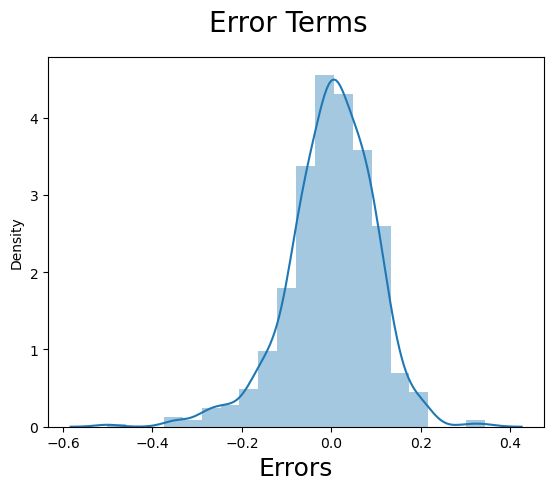

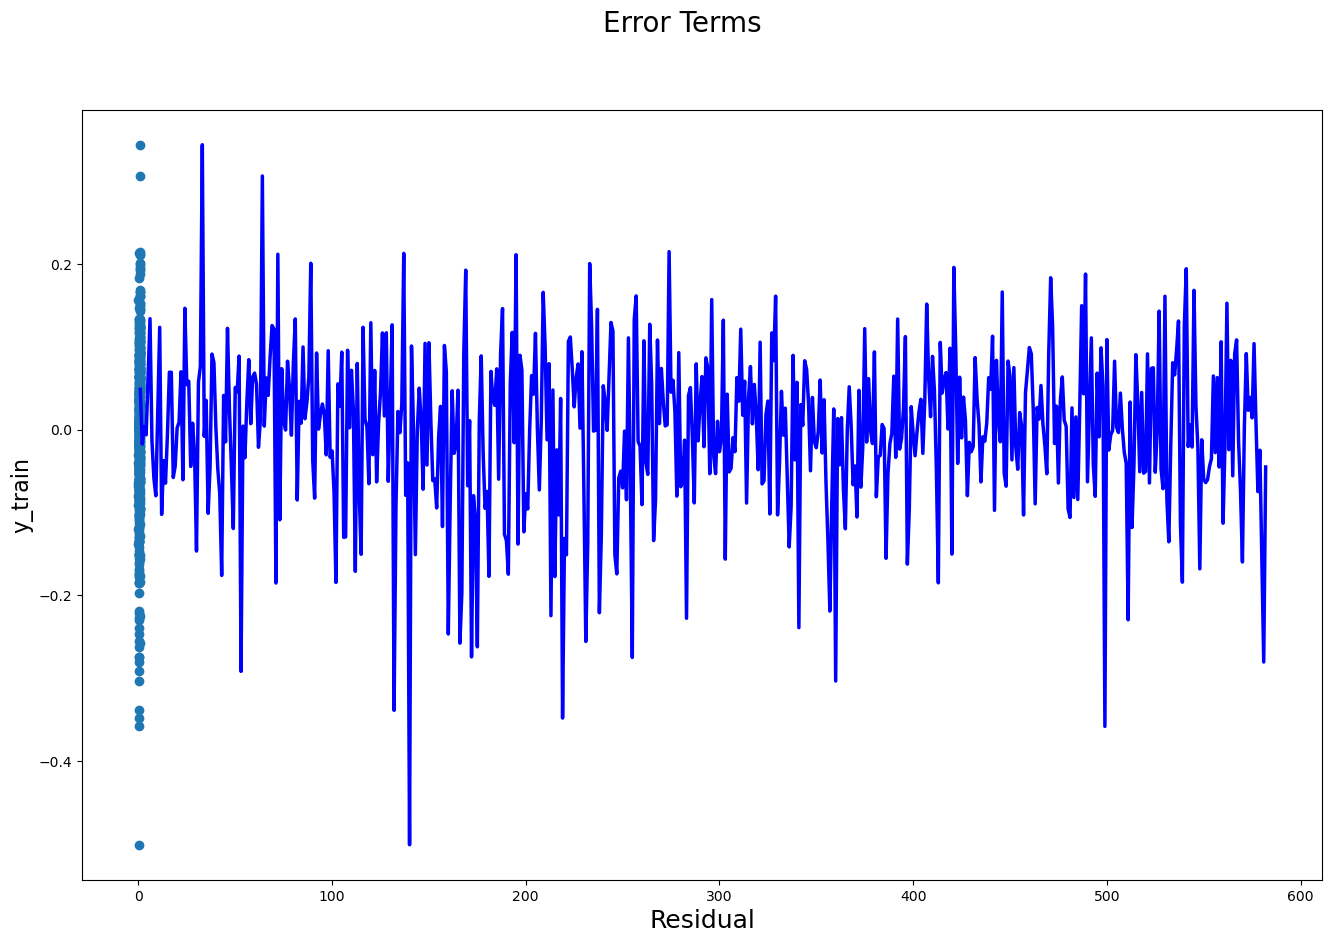

In [74]:
res=(y_train-y_train_cnt)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

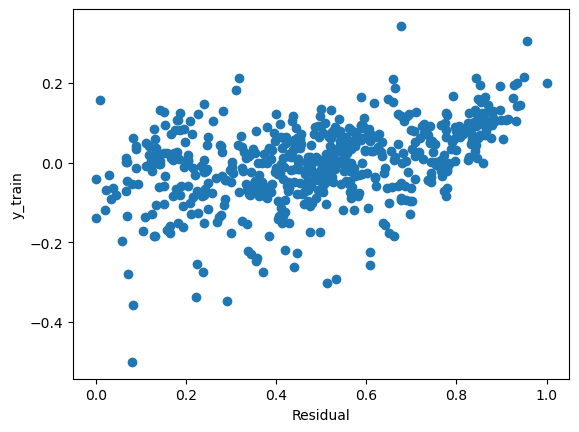

In [75]:
res=(y_train-y_train_cnt)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

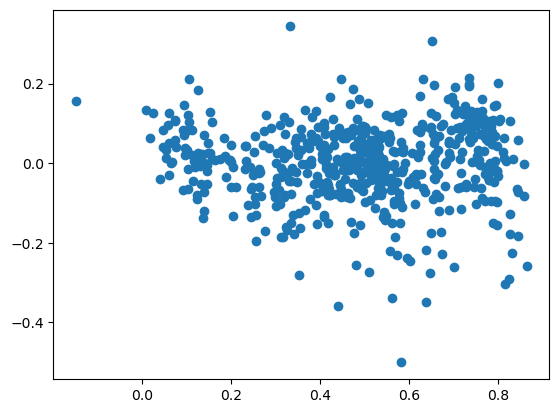

In [76]:
res=(y_train-y_train_cnt)
plt.scatter(y_train_cnt,res)
plt.show()

In [77]:
X_t=X_train_rfe6.iloc[:,0].values
X_t.shape

(582,)

### Residual analysis plot

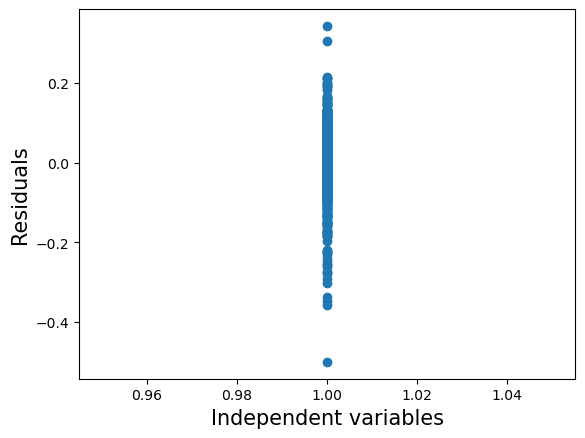

In [78]:
"""TEST"""
#PLotting the residuals to check for pattern existance
#Checking the assumption of autocorrelation and homoscedasticity 
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=15)              
plt.xlabel('Independent variables', fontsize=15)                          
plt.ylabel('Residuals', fontsize=15)  
plt.show()

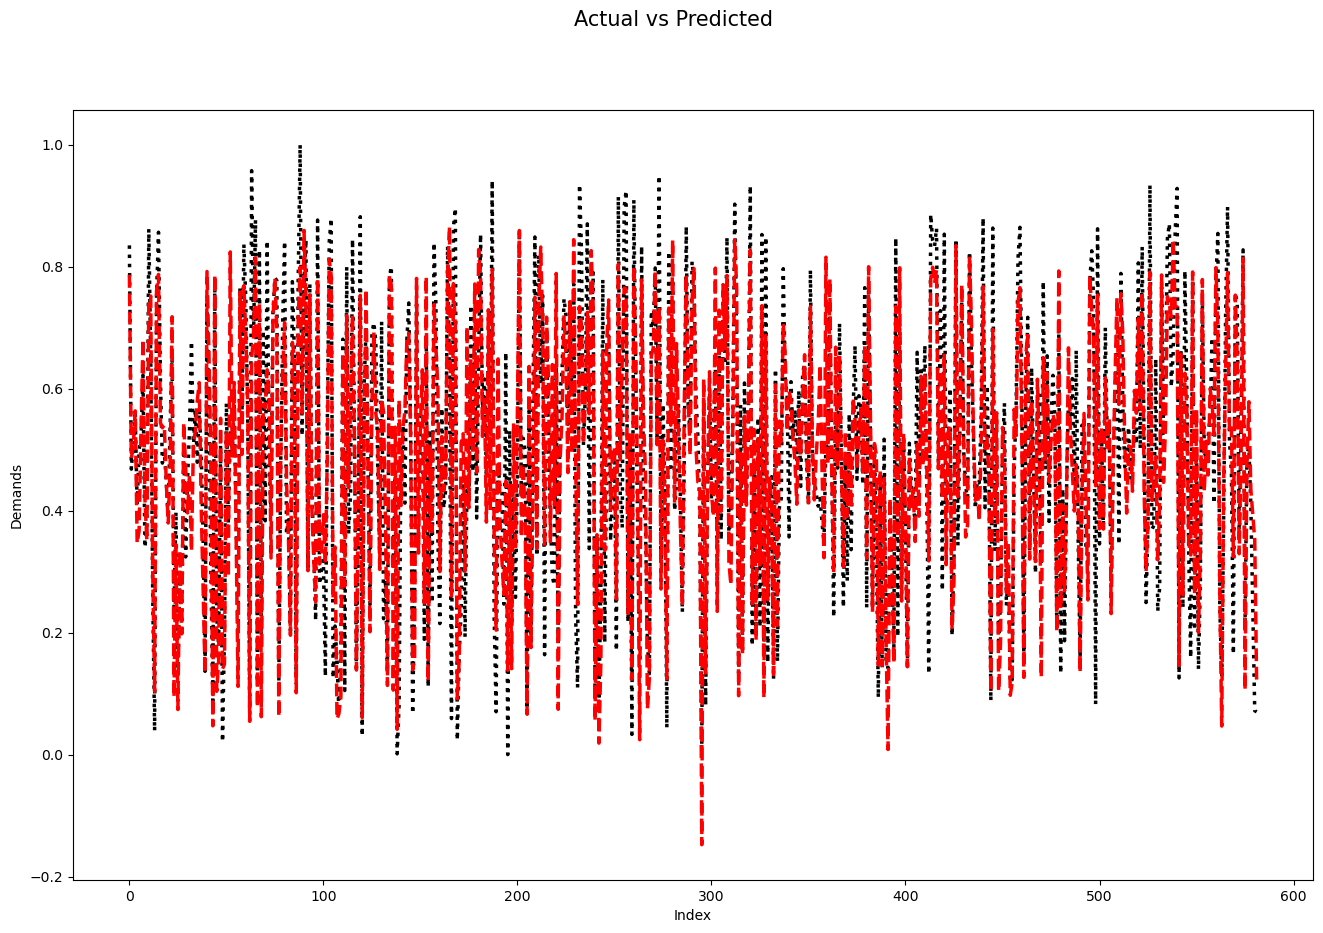

In [79]:
c = [i for i in range(0,len(y_train),1)]
plt.figure(figsize = (16, 10))
plt.plot(c,y_train, color="black", linewidth=2.5, linestyle='dotted')
plt.plot(c,y_train_cnt, color="red",  linewidth=2.5, linestyle='dashed')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [ ]:
### Linearity

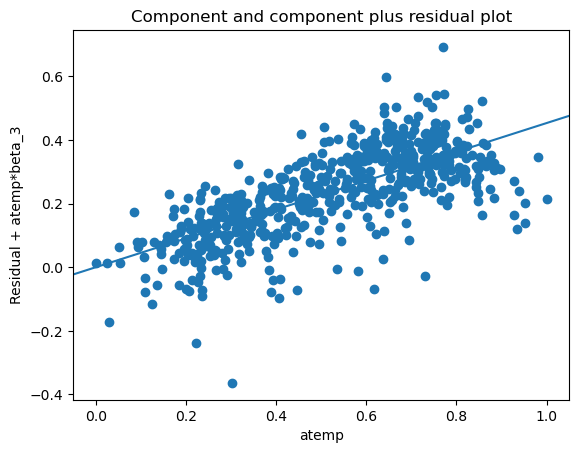

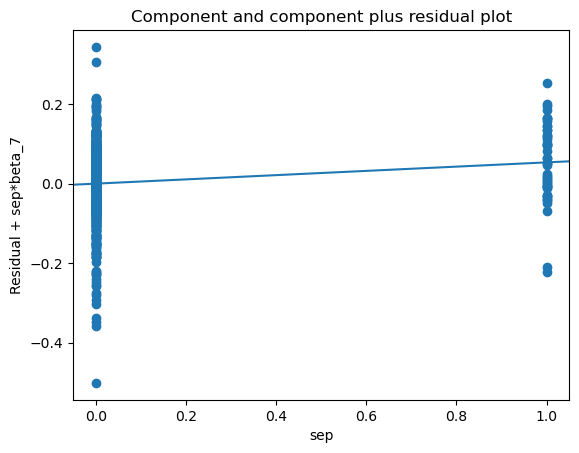

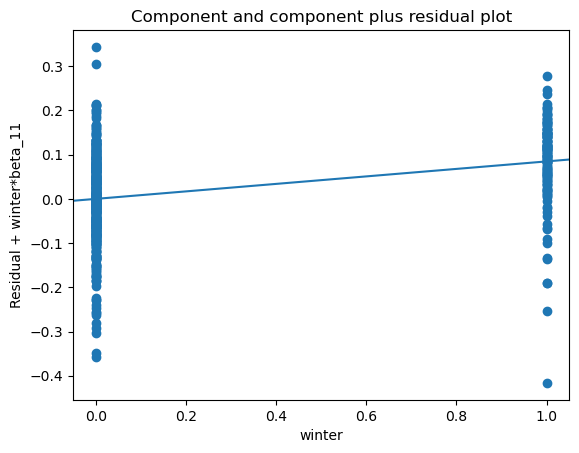

In [80]:

# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'winter')
plt.show()

Linearity can be observed from above graphs

<b> Homoscedasticity </b>

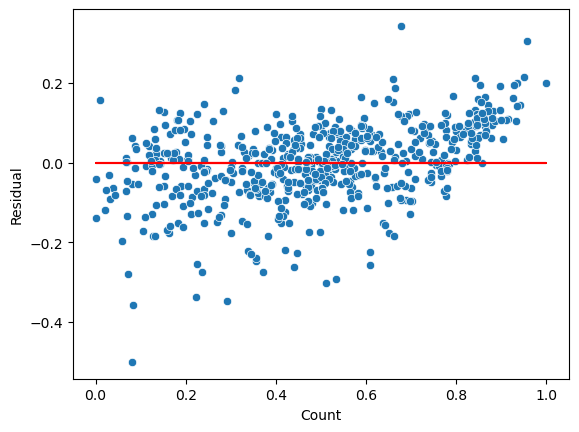

In [81]:
y_train_pred = lr_6.predict(X_train_rfe6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

<b>Independence of residuals</b>

Durbin-Watson value of final model lr_6 is 1.985, which signifies there is no autocorrelation.

## Step 7: Making Predictions and Evaluation Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.


In [82]:
num_vars=['atemp','humidity','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
# Now using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lm.predict(X_test_new)

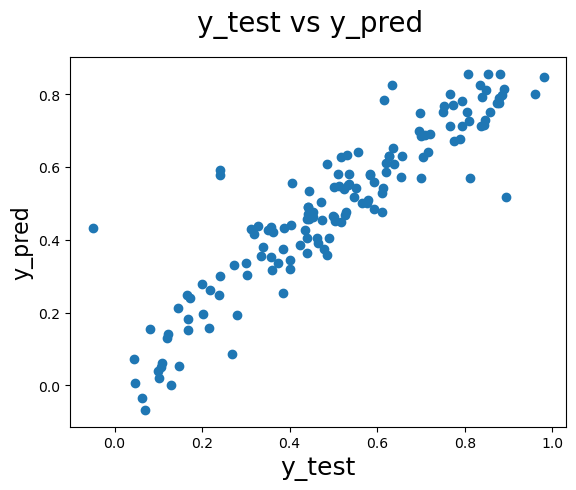

In [85]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.009796785331820958

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09897871150818725

In [88]:
from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test,y_pred=y_pred)
#r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8286

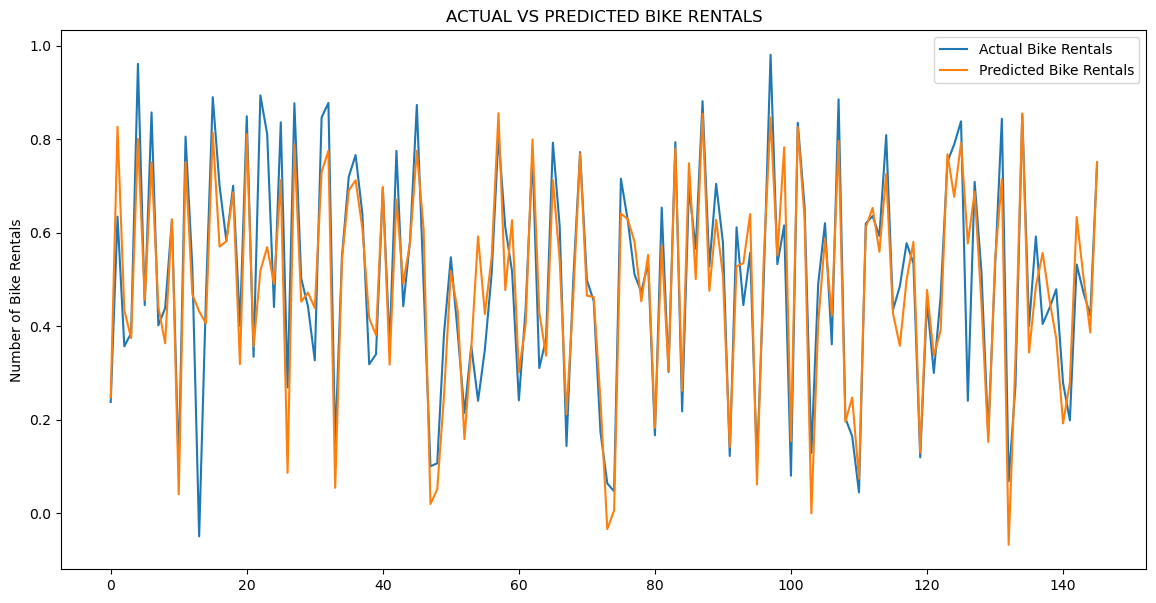

In [89]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual Bike Rentals','Predicted Bike Rentals'])
plt.title('ACTUAL VS PREDICTED BIKE RENTALS');
plt.ylabel('Number of Bike Rentals')
#plt.xticks([])
plt.show()

In [90]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.53e-210
Time:                        00:54:24   Log-Likelihood:                 547.91
No. Observations:                 582   AIC:                            -1066.
Df Residuals:                     567   BIC:                            -1000.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2851      0.027     10.

In [91]:
round(lr_6.params,4)

const             0.1946
year              0.2496
holiday          -0.0728
atemp             0.4534
dec              -0.0704
july             -0.0521
nov              -0.0682
sep               0.0535
Light_snowrain   -0.2765
Misty            -0.0850
spring           -0.1401
winter            0.0848
dtype: float64

### We can see that the equation of our best fitted line is:

##### cnt = 0.1946 + 0.2496 X year - 0.0728 X holiday + 0.4534 X atemp - 0.0704 X dec + 0.0521 X july -0.0682 X nov + 0.0535 X sep - 0.2765 X (Light snowrain) - 0.0850 X Misty - 0.1401 X spring + 0.0848 Xwinter   

In [93]:
# Calculating Adjusted-R^2 value for the test dataset usig formula

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)


0.7876


###### Accuracy i.e R2_Score comes out to 78.76%                                                                                                                                                                

###### Root mean square error comes out to be 0.10

R-squared:                       0.833                     
Adj. R-squared:                  0.829                    
F-statistic:                     202.6

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.823
- Test dataset R^2           : 0.833
- Train dataset Adjusted R^2 : 0.820    
- Test dataset Adjusted R^2  : 0.789

Demand of bikes depend on year, holiday, atemp, , sep, Light_snowrain, Misty, spring, summer and winter.